In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graph-response/calculated_dataset.xlsx


## Loading Excel to Pandas

In [2]:
xlsx_file = "/kaggle/input/graph-response/calculated_dataset.xlsx"
xlsx_data = pd.read_excel(xlsx_file, sheet_name=None, header=0)
combined_df = xlsx_data['Combined']
m3_df = xlsx_data['M3']
oporajita_df = xlsx_data['Oporajita']
design_df = xlsx_data['Design']


## Sentiment Graphs BY Each Row

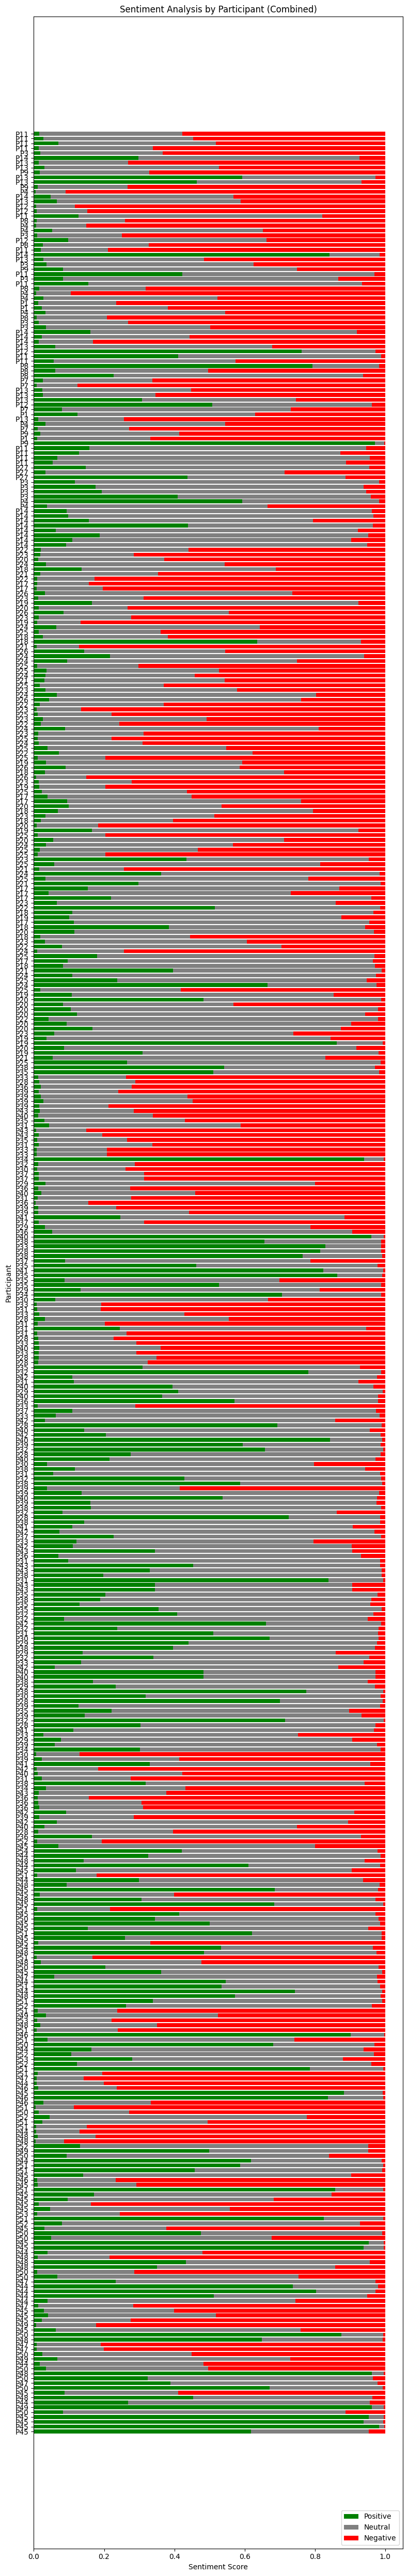

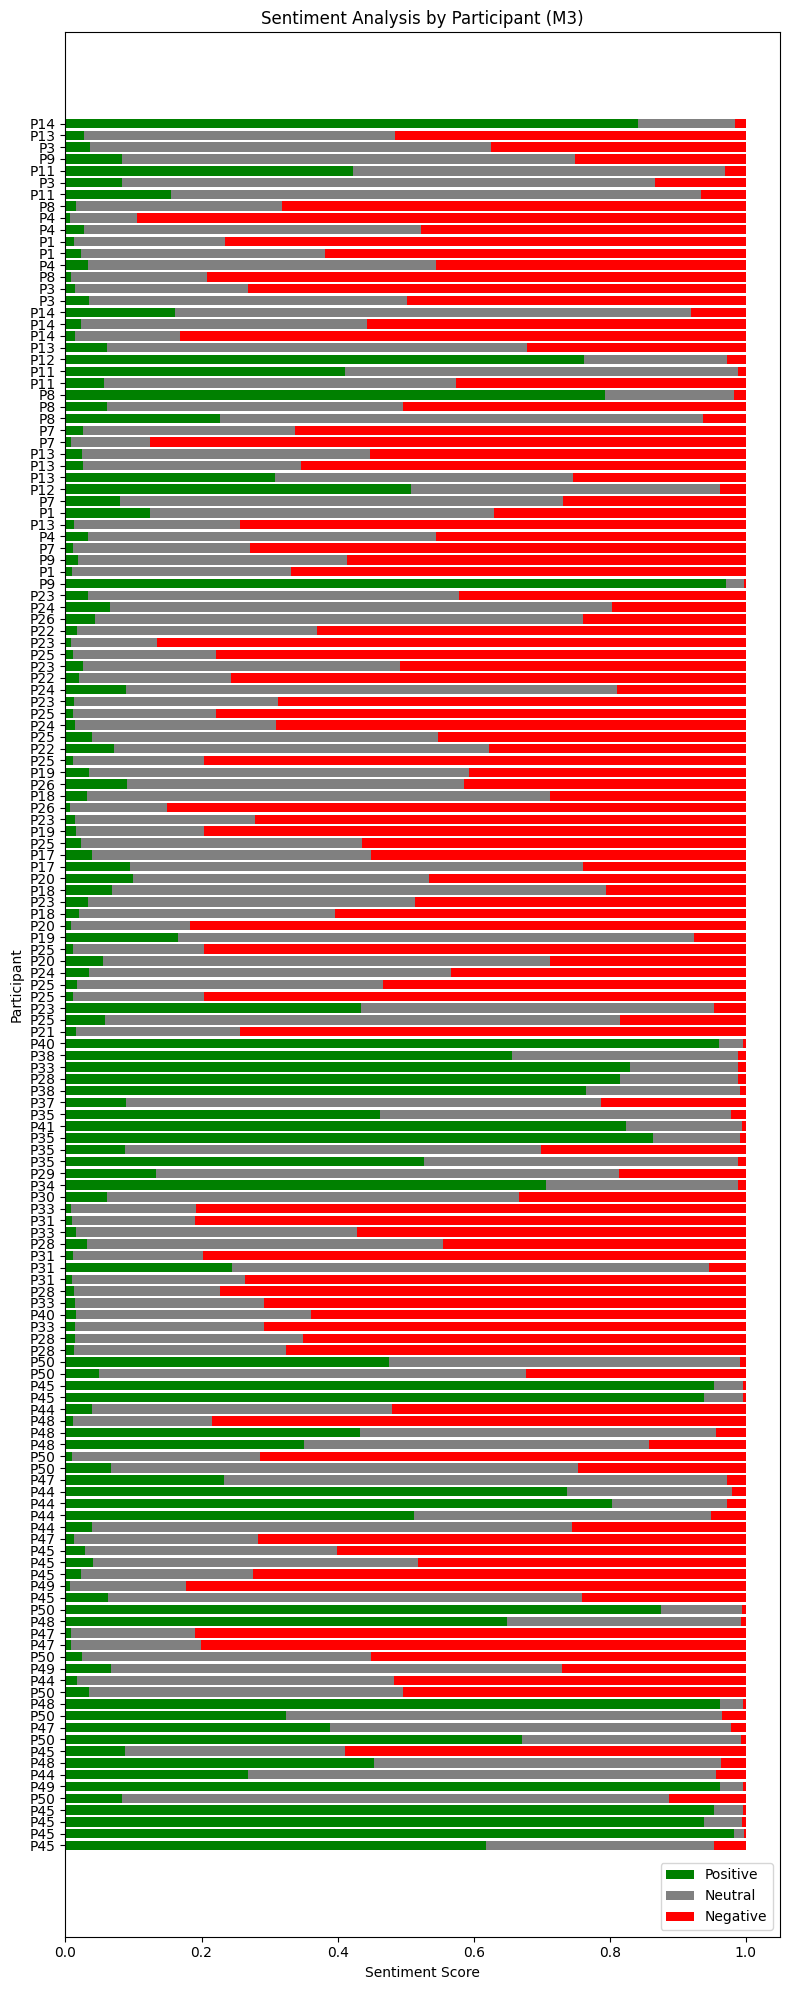

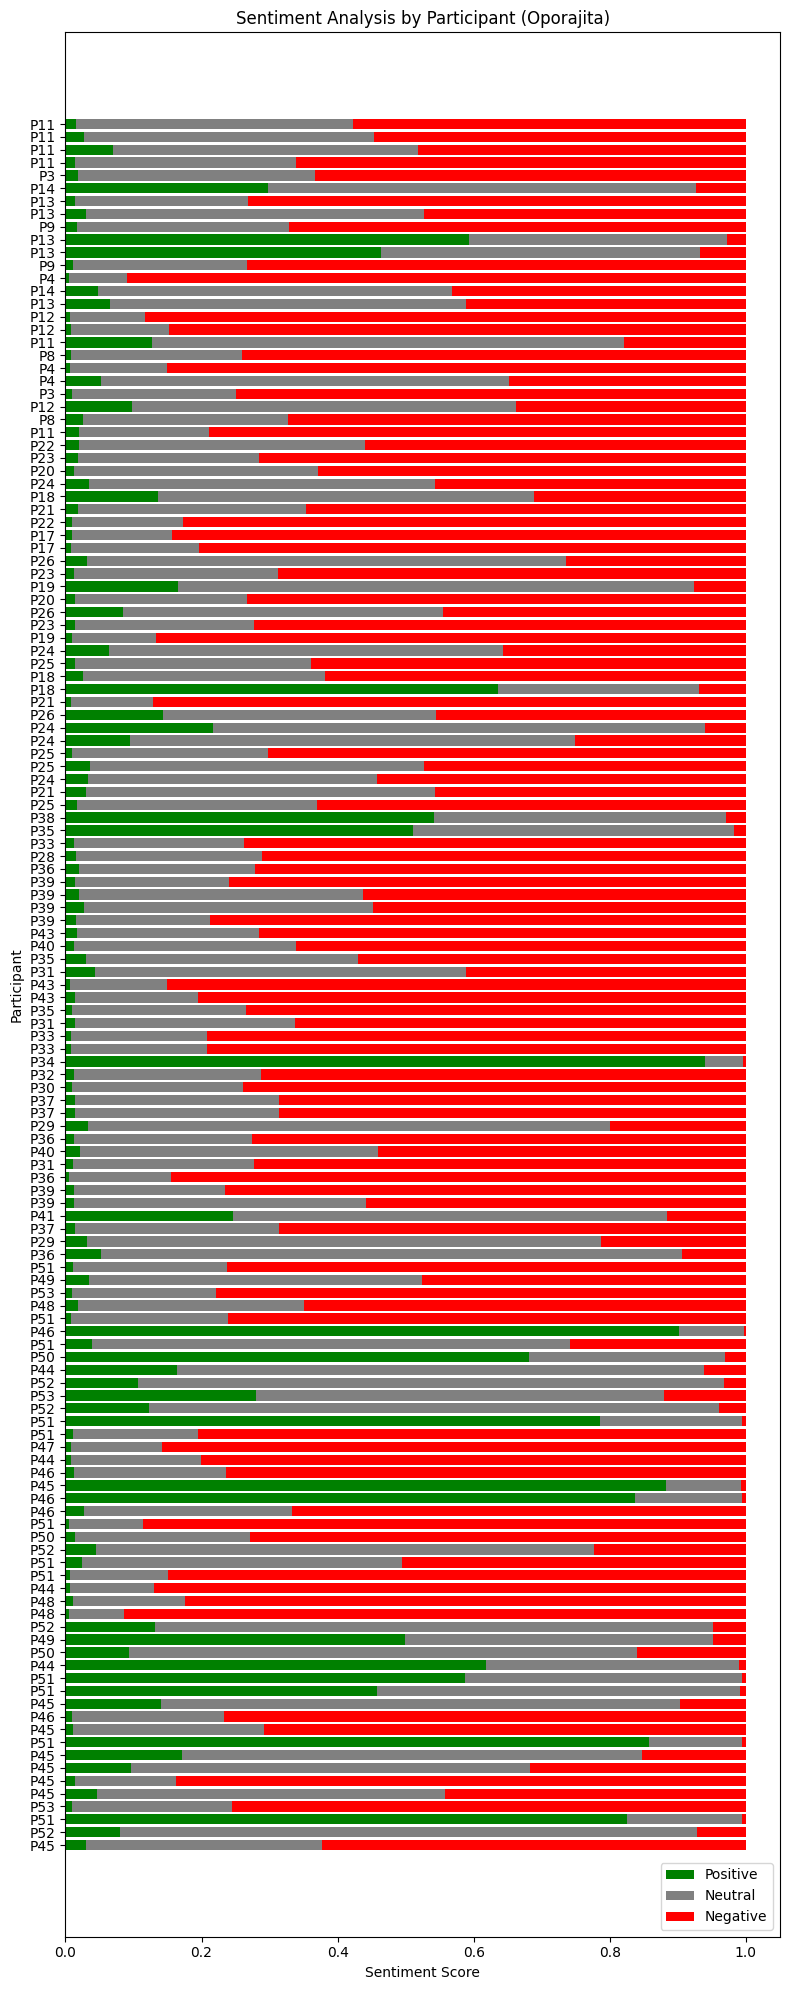

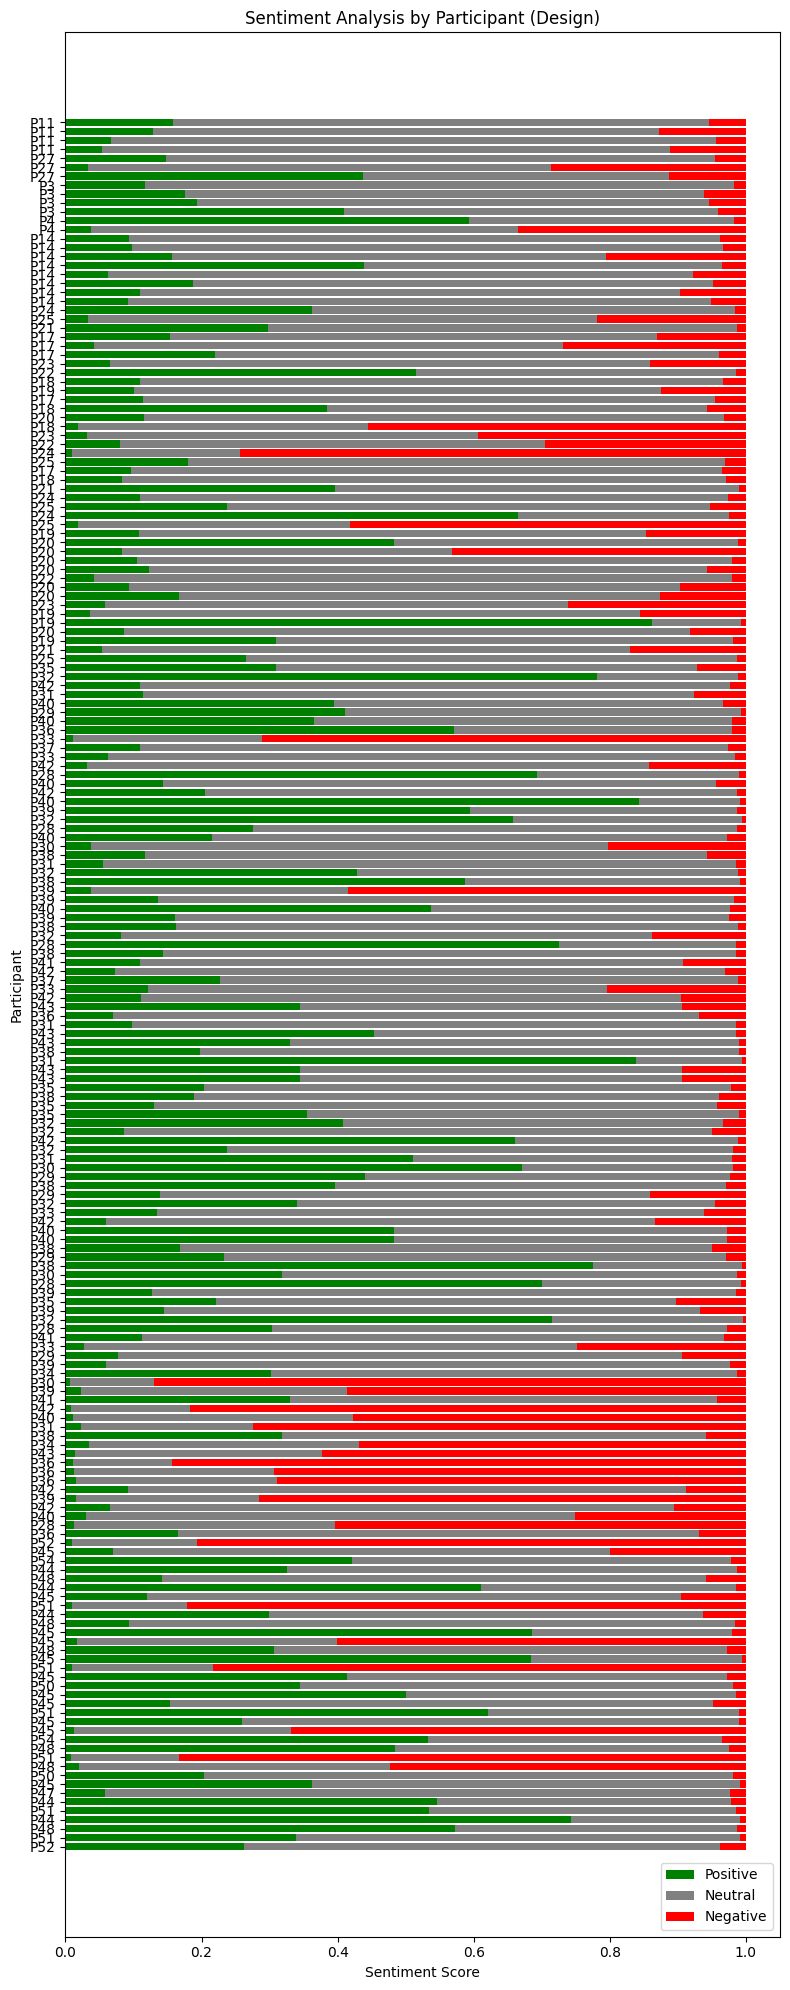

In [3]:
def plot_stacked_bar(df, title, x, y):
    # Stacked bar chart
    plt.figure(figsize=(x, y))

    # Create an array of y-coordinates for each participant
    y = np.arange(len(df))

    # Iterate through each row in the DataFrame
    for i, row in df.iterrows():
        participant = row['Participant']
        plt.barh(y[i], row['Sentiment_Positive'], color='green', label='Positive' if i == 0 else None)
        plt.barh(y[i], row['Sentiment_Neutral'], left=row['Sentiment_Positive'], color='grey', label='Neutral' if i == 0 else None)
        plt.barh(y[i], row['Sentiment_Negative'], left=row['Sentiment_Positive'] + row['Sentiment_Neutral'], color='red', label='Negative' if i == 0 else None)

    plt.xlabel('Sentiment Score')
    plt.ylabel('Participant')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.yticks(y, df['Participant'])  # Set y-ticks to participant names
    plt.tight_layout()
    plt.show()

plot_stacked_bar(combined_df, 'Sentiment Analysis by Participant (Combined)',8,50)
plot_stacked_bar(m3_df, 'Sentiment Analysis by Participant (M3)',8,20)
plot_stacked_bar(oporajita_df, 'Sentiment Analysis by Participant (Oporajita)',8,20)
plot_stacked_bar(design_df, 'Sentiment Analysis by Participant (Design)',8,20)


## Average Sentiment Scores of participants

In [4]:
sentiment = ['Group', 'Participant', 'Description', 'Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative']
def avg_sentiment_participant_dataframe(df):
    df_grouped = df.groupby('Participant').agg({
        'Group': 'first',
        'Description': lambda x: ' '.join(x),  # Concatenate descriptions
        'Sentiment_Positive': 'mean',
        'Sentiment_Neutral': 'mean',
        'Sentiment_Negative': 'mean'
    }).reset_index()

    # Define a function to extract the numeric part from the participant string
    def extract_numeric_part(participant):
        numeric_part = re.findall(r'\d+', participant)
        if numeric_part:
            return int(numeric_part[0])
        else:
            return 0

    # Sort the participants based on the extracted numeric part
    sorted_participants = sorted(df_grouped['Participant'], key=extract_numeric_part)

    # Reorder the dataframe based on the sorted participants
    df_grouped['Participant'] = pd.Categorical(df_grouped['Participant'], categories=sorted_participants, ordered=True)
    df_grouped = df_grouped.sort_values('Participant')

    return df_grouped





## Graphing Sentiment Scores Per Participant

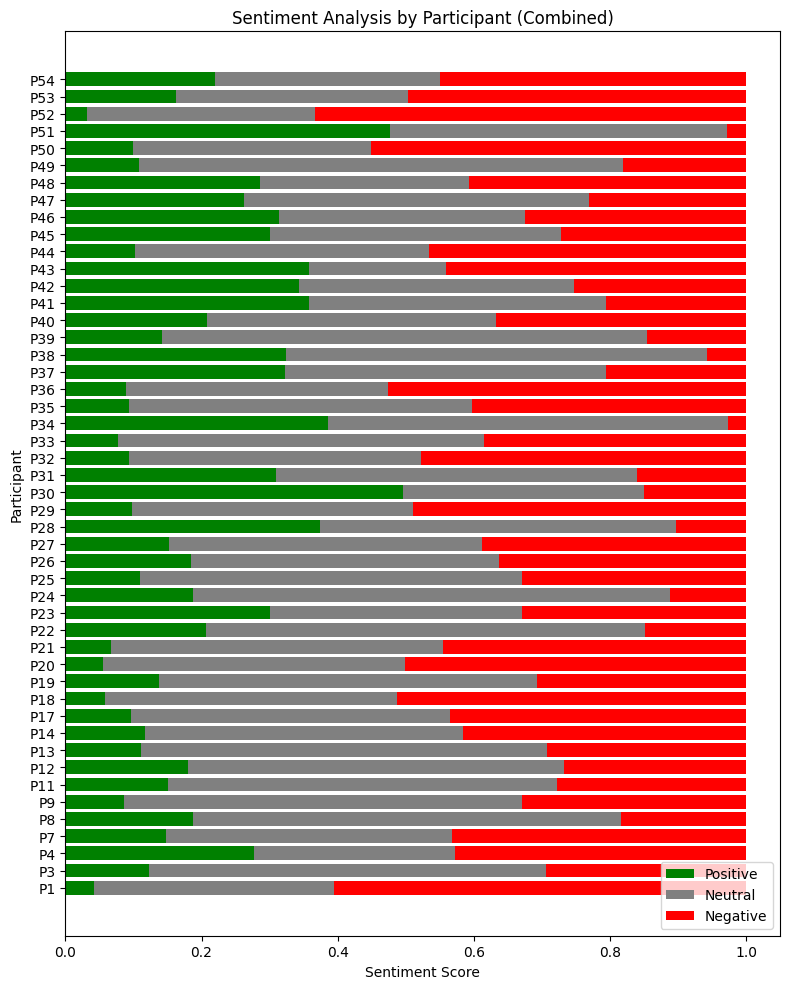

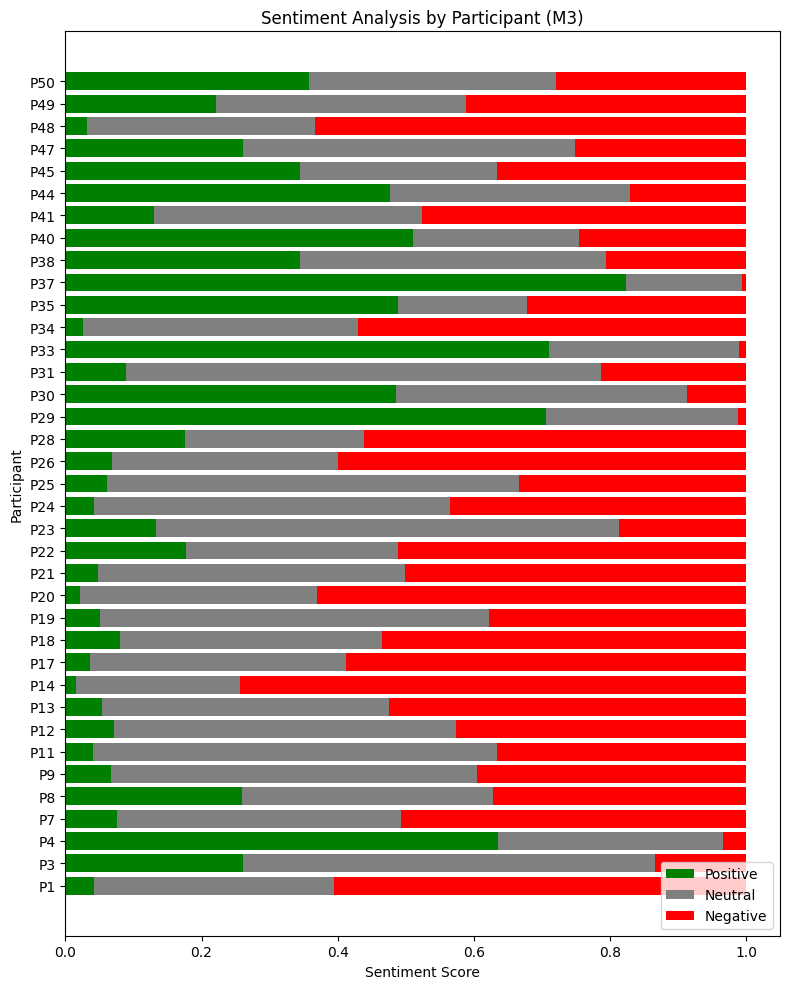

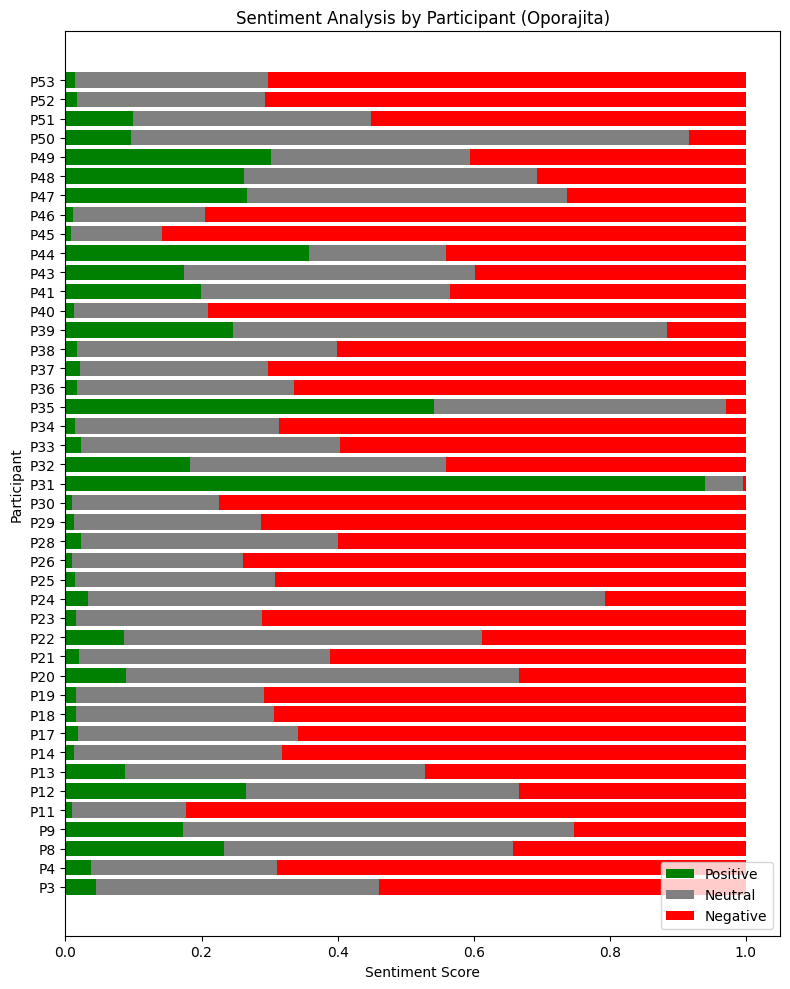

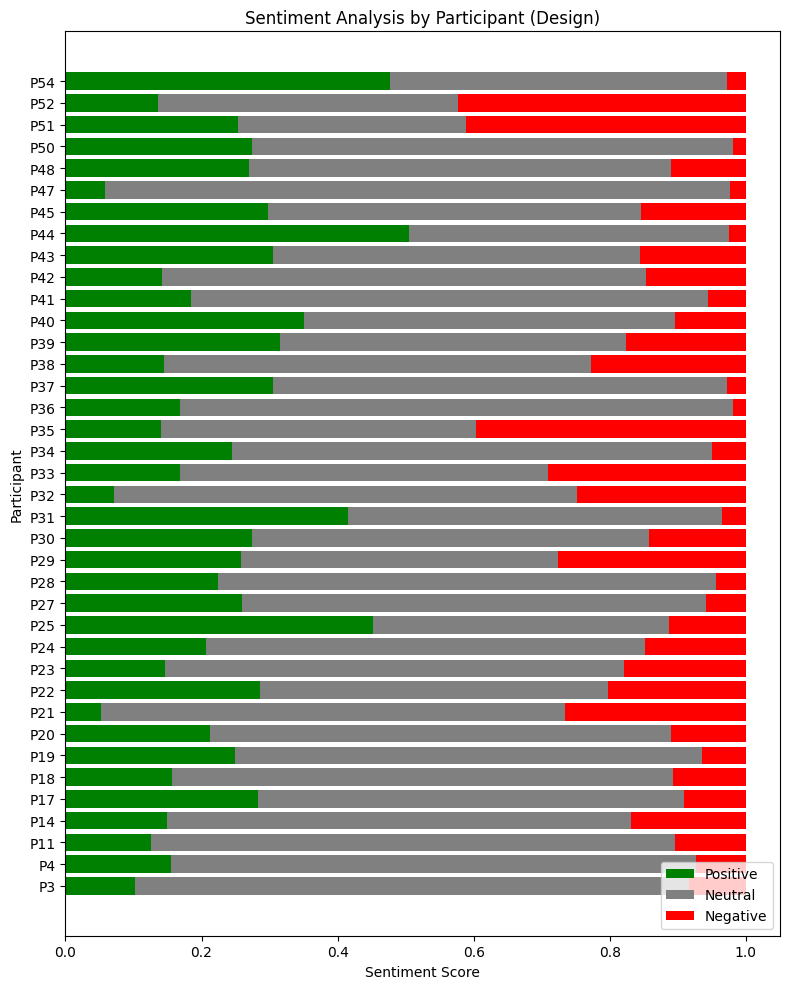

In [5]:
avg_combined_df = avg_sentiment_participant_dataframe(combined_df)
avg_m3_df = avg_sentiment_participant_dataframe(m3_df)
avg_oporajita_df = avg_sentiment_participant_dataframe(oporajita_df)
avg_design_df = avg_sentiment_participant_dataframe(design_df)
plot_stacked_bar(avg_combined_df,'Sentiment Analysis by Participant (Combined)',8,10)
plot_stacked_bar(avg_m3_df,'Sentiment Analysis by Participant (M3)',8,10)
plot_stacked_bar(avg_oporajita_df,'Sentiment Analysis by Participant (Oporajita)',8,10)
plot_stacked_bar(avg_design_df,'Sentiment Analysis by Participant (Design)',8,10)


## Average Sentiment Scores for Groups

In [6]:
sentiment = ['Group', 'Participant', 'Description', 'Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative']
def plot_stacked_bar_group(df, title, x, y):
    # Stacked bar chart
    plt.figure(figsize=(x, y))

    # Create an array of y-coordinates for each group
    y = np.arange(len(df))

    # Iterate through each row in the DataFrame
    for i, row in df.iterrows():
        participant = row['Group']
        plt.barh(y[i], row['Sentiment_Positive'], color='green', label='Positive' if i == 0 else None)
        plt.barh(y[i], row['Sentiment_Neutral'], left=row['Sentiment_Positive'], color='grey', label='Neutral' if i == 0 else None)
        plt.barh(y[i], row['Sentiment_Negative'], left=row['Sentiment_Positive'] + row['Sentiment_Neutral'], color='red', label='Negative' if i == 0 else None)

    plt.xlabel('Sentiment Score')
    plt.ylabel('Group')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.yticks(y, df['Group'])  # Set y-ticks to participant names
    plt.tight_layout()
    plt.show()


def avg_sentiment_group_dataframe(df):
    df_grouped = df.groupby('Group').agg({
        'Sentiment_Positive': 'mean',
        'Sentiment_Neutral': 'mean',
        'Sentiment_Negative': 'mean'
    }).reset_index()
    return df_grouped





## Graphing Sentiment Scores Per Group

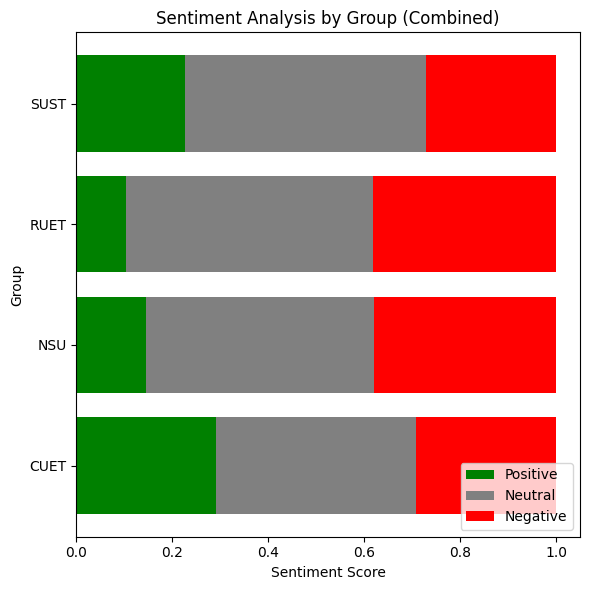

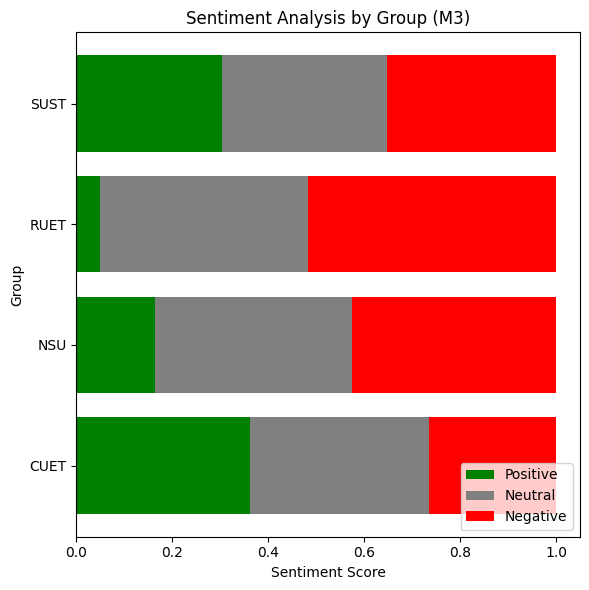

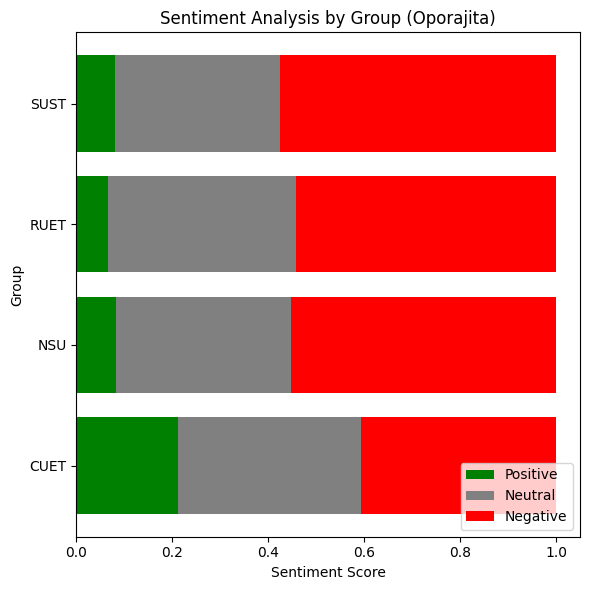

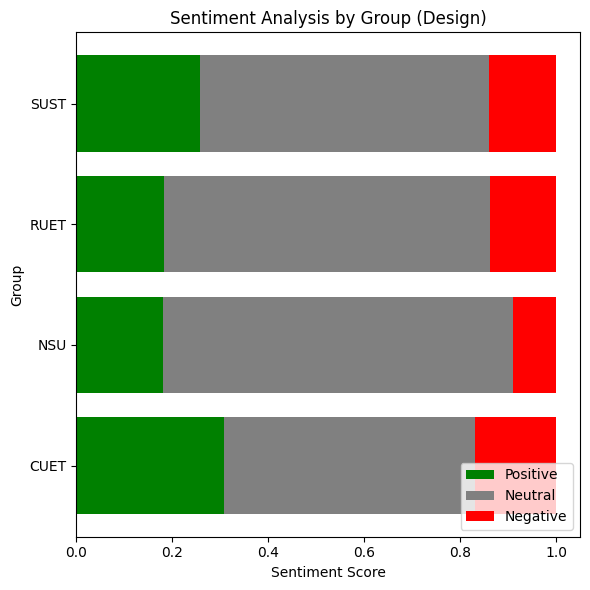

In [7]:
plot_stacked_bar_group(avg_sentiment_group_dataframe(combined_df), 'Sentiment Analysis by Group (Combined)',6,6)
plot_stacked_bar_group(avg_sentiment_group_dataframe(m3_df), 'Sentiment Analysis by Group (M3)',6,6)
plot_stacked_bar_group(avg_sentiment_group_dataframe(oporajita_df), 'Sentiment Analysis by Group (Oporajita)',6,6)
plot_stacked_bar_group(avg_sentiment_group_dataframe(design_df), 'Sentiment Analysis by Group (Design)',6,6)


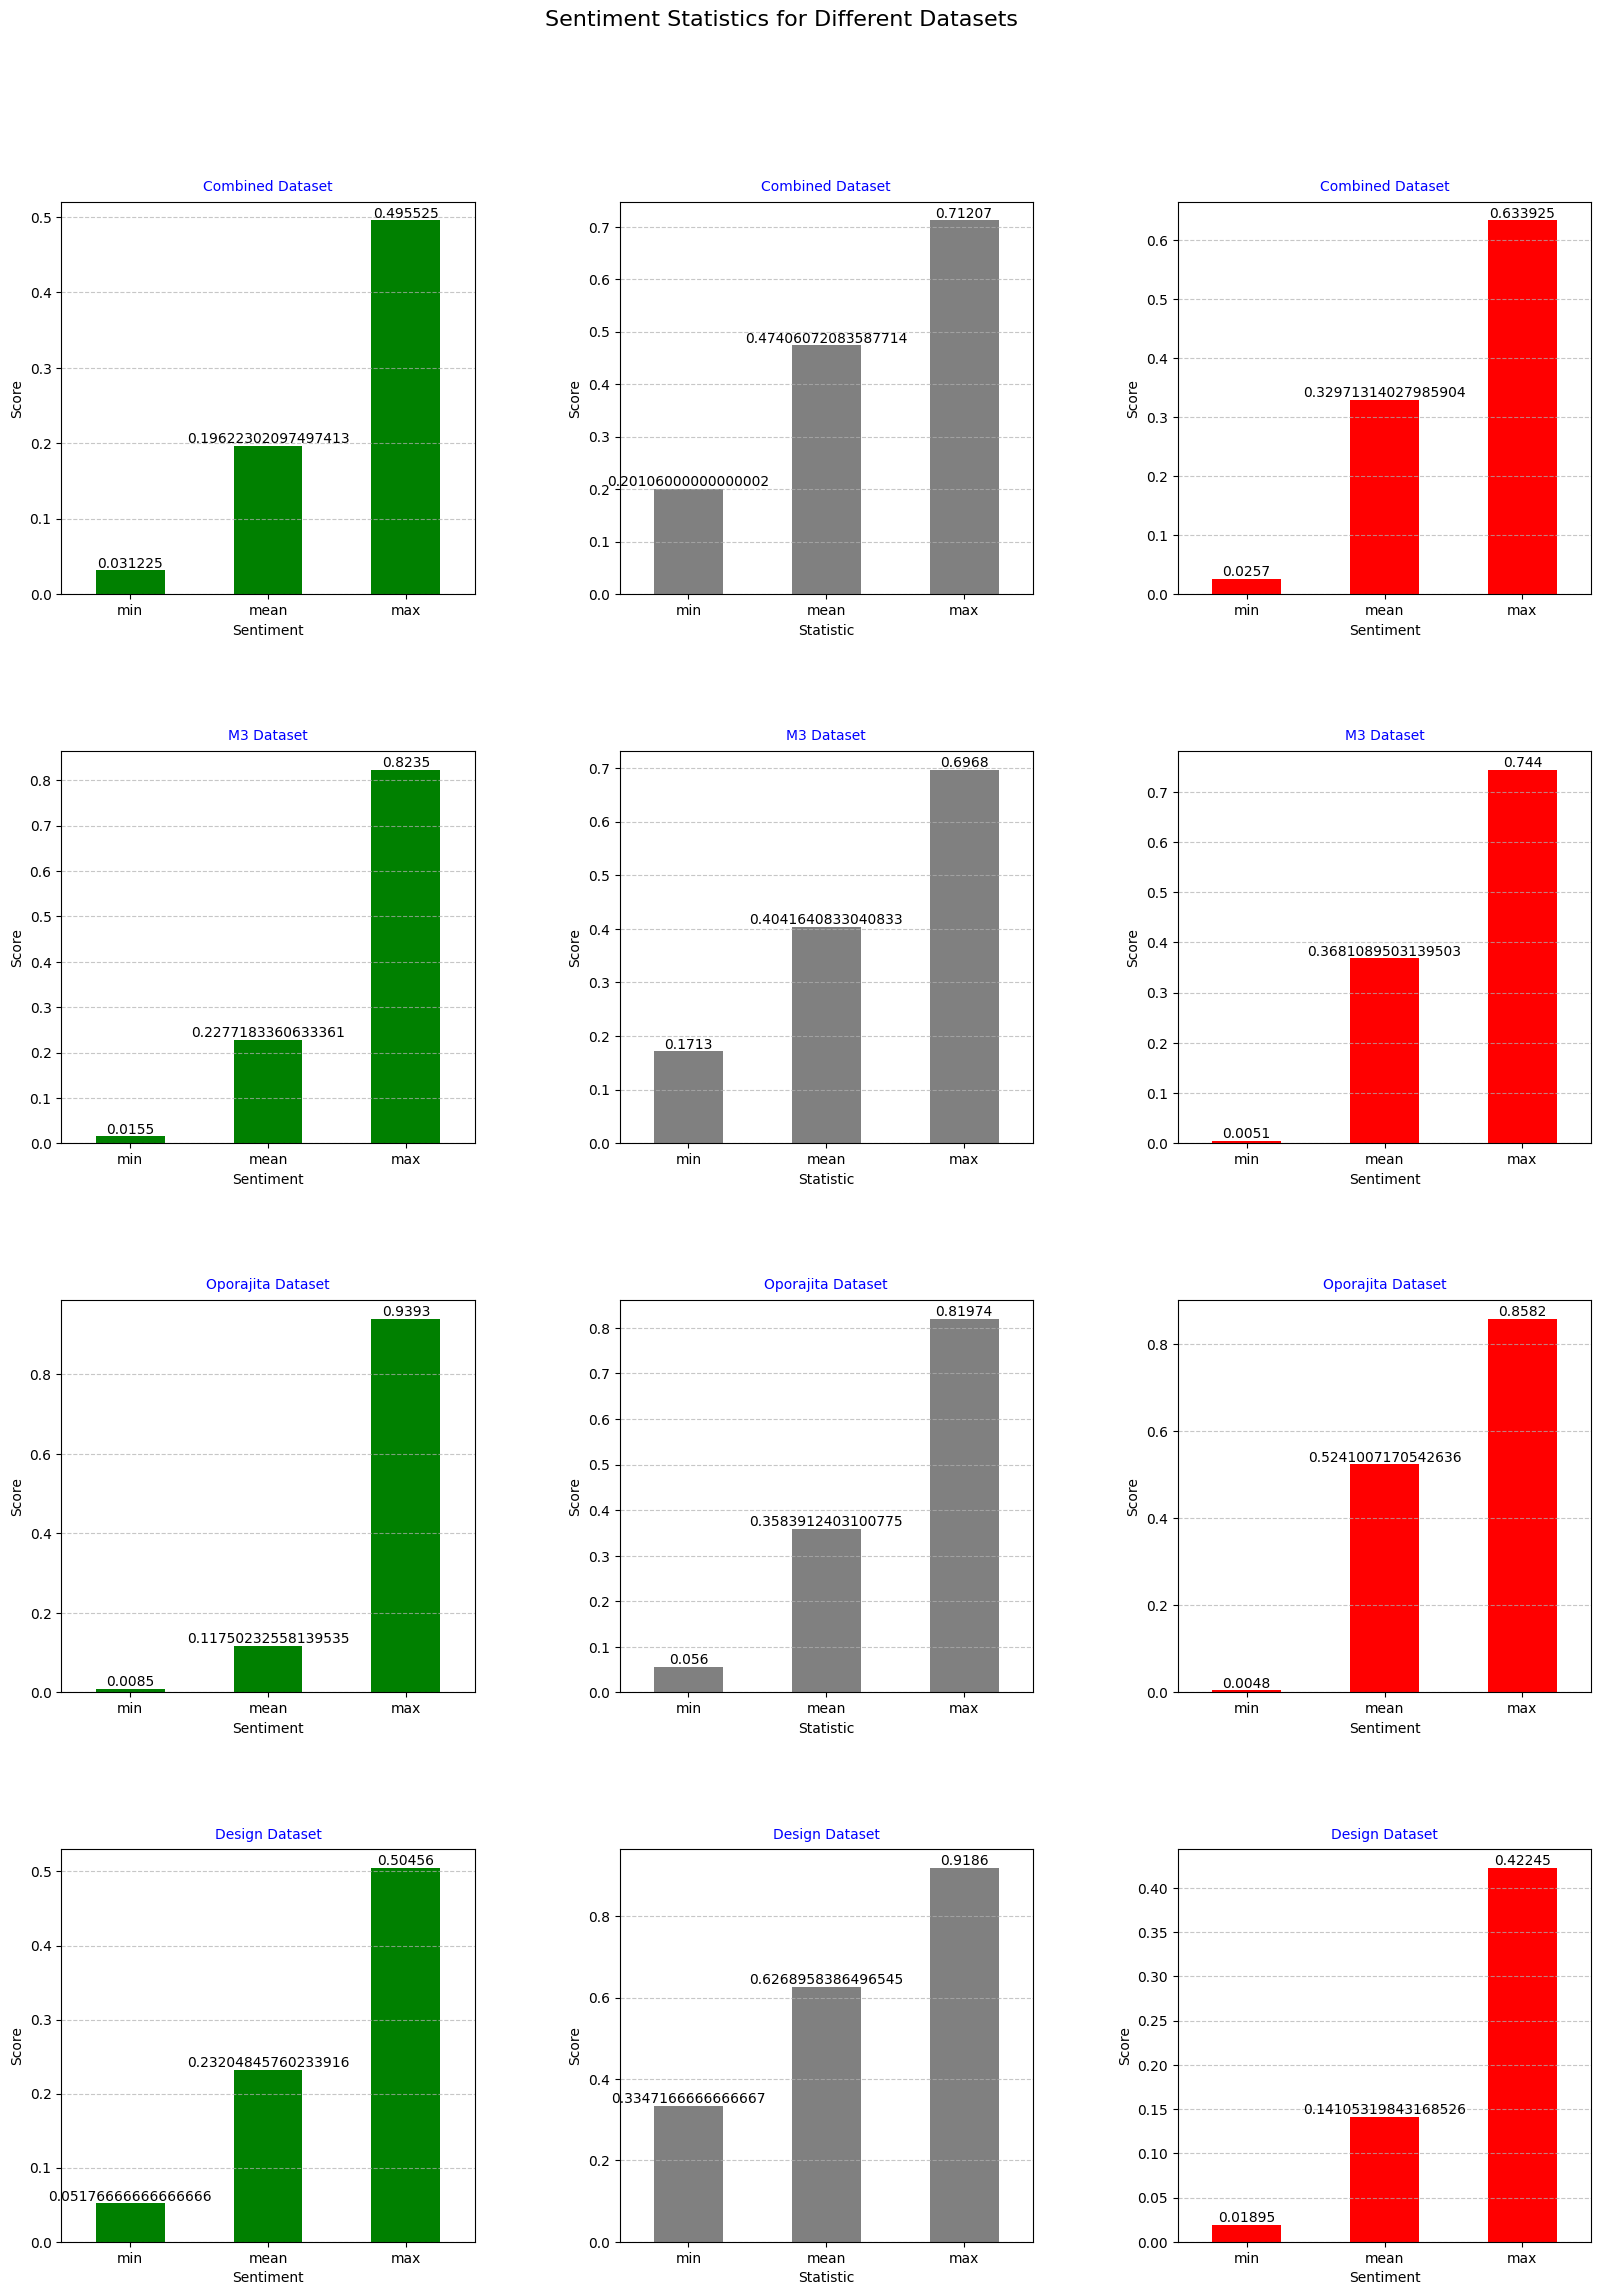

In [8]:
def sentiment_stats_plot(df, title, ax):
    # Define colors for each sentiment
    colors = ['green', 'gray', 'red']

    sentiments = ['Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative']

    for i, sentiment in enumerate(sentiments):
        # Calculate min, avg, max for current sentiment
        summary_df = df[sentiment].agg(['min', 'mean', 'max'])

        # Plotting bars for current sentiment
        summary_df.plot(kind='bar', ax=ax[i], color=colors[i], legend=False)
        ax[i].set_title(sentiment.capitalize() + ' Statistics')
        ax[i].set_xlabel('Sentiment')
        ax[i].set_ylabel('Score')
        ax[i].set_xticklabels(summary_df.index, rotation=0)
        ax[i].grid(axis='y', linestyle='--', alpha=0.7)
        
        ax[i].set_title(title, fontsize=10, pad=8, color='blue')

        # Adding exact values above the bars
        for j, v in enumerate(summary_df.values.flatten()):
            ax[i].text(j, v, str(v), ha='center', va='bottom')

    ax[0].set_ylabel('Score')
    ax[1].set_xlabel('Statistic')

    



# Plotting all DataFrames in a single figure
fig, axs = plt.subplots(4, 3, figsize=(18, 24))

sentiment_stats_plot(avg_combined_df, 'Combined Dataset', axs[0])
sentiment_stats_plot(avg_m3_df, 'M3 Dataset', axs[1])
sentiment_stats_plot(avg_oporajita_df, 'Oporajita Dataset', axs[2])
sentiment_stats_plot(avg_design_df, 'Design Dataset', axs[3])

plt.subplots_adjust(top=0.9, bottom=0.05, left=0.10, right=0.95, hspace=0.4, wspace=0.35)
plt.suptitle('Sentiment Statistics for Different Datasets', fontsize=16)
plt.show()


35
[[ 2  2  4]
 [ 0  4  8]
 [ 0  4 11]]


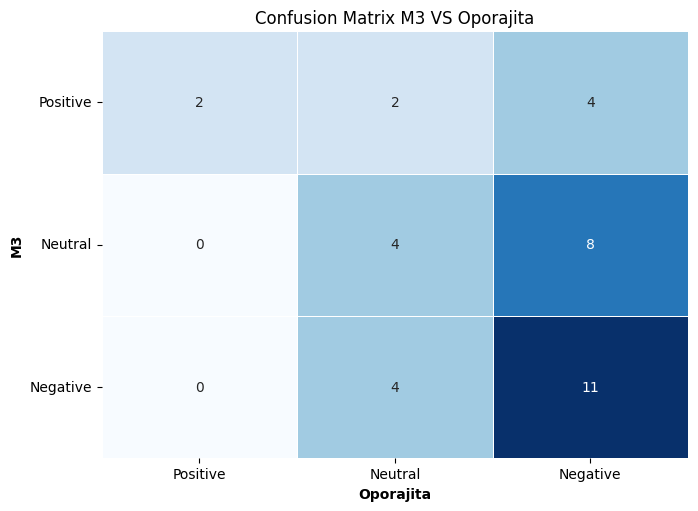

In [9]:
# Convert to DataFrames
df1 = avg_m3_df
df2 = avg_oporajita_df

# Merge DataFrames based on 'participant'
common_participants = pd.merge(df1, df2, on='Participant', how='inner')
print(len(common_participants))

# Get true and predicted labels
true_labels = common_participants[['Sentiment_Positive_x', 'Sentiment_Neutral_x', 'Sentiment_Negative_x']].values
predicted_labels = common_participants[['Sentiment_Positive_y', 'Sentiment_Neutral_y', 'Sentiment_Negative_y']].values

# Compute confusion matrix
cm = confusion_matrix(np.argmax(true_labels, axis=1), np.argmax(predicted_labels, axis=1))
print(cm)

classes = ['Positive', 'Neutral', 'Negative']
# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', linewidths=.5, cbar=False)

plt.tight_layout()
plt.title('Confusion Matrix M3 VS Oporajita')
plt.ylabel('M3', fontweight='bold')
plt.xlabel('Oporajita', fontweight='bold')
plt.gca().set_xticks(np.arange(len(classes)) + 0.5, minor=False)
plt.gca().set_yticks(np.arange(len(classes)) + 0.5, minor=False)
plt.gca().set_xticklabels(classes, rotation=0)
plt.gca().set_yticklabels(classes, rotation=0)
plt.show()


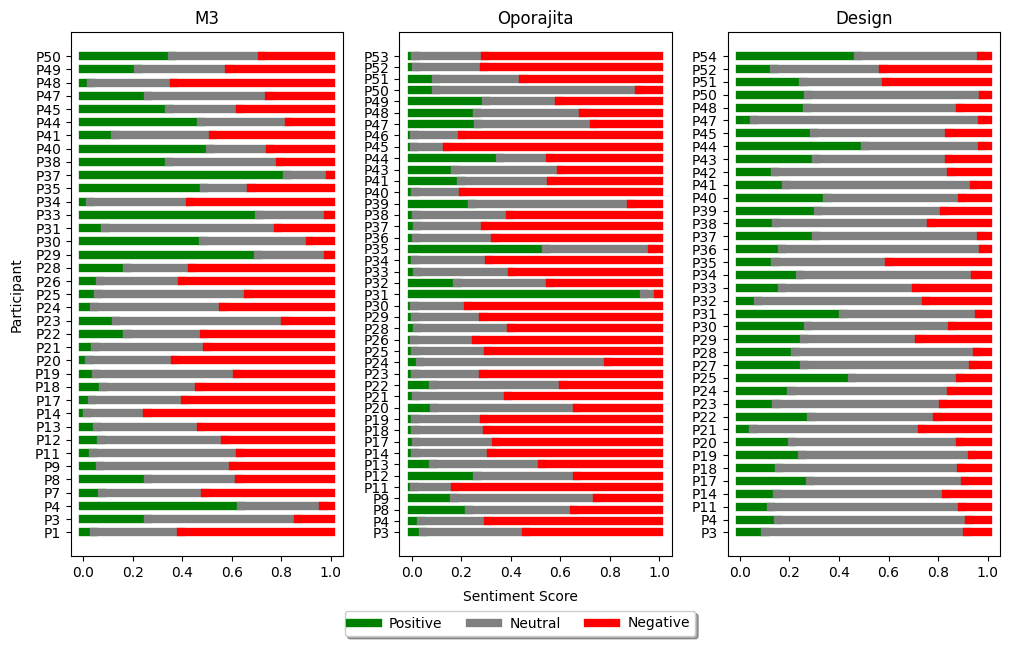

Sentiment Analysis for each Participant


In [10]:
def plot_thin_stacked_bar_subplot(df, title, ax, legend=False):
    # Stacked bar chart
    # Create an array of y-coordinates for each participant
    y = np.arange(len(df))

    # Define width for the bars
    bar_width = 1.5

    # Iterate through each row in the DataFrame
    for i, row in df.iterrows():
        participant = row['Participant']
        ax.plot([0, row['Sentiment_Positive']], [y[i], y[i]], color='green', linewidth=4*bar_width, label='Positive' if i == 0 else None)
        ax.plot([row['Sentiment_Positive'], row['Sentiment_Positive'] + row['Sentiment_Neutral']], [y[i], y[i]], color='grey', linewidth=4*bar_width, label='Neutral' if i == 0 else None)
        ax.plot([row['Sentiment_Positive'] + row['Sentiment_Neutral'], row['Sentiment_Positive'] + row['Sentiment_Neutral'] + row['Sentiment_Negative']], [y[i], y[i]], color='red', linewidth=4*bar_width, label='Negative' if i == 0 else None)
    ax.set_title(title)
    ax.set_yticks(y)
    ax.set_yticklabels(df['Participant']) 

    
custom_tick_labels = ['Participant A', 'Participant B', 'Participant C']    
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 6))

# Plot each DataFrame on a separate subplot
plot_thin_stacked_bar_subplot(avg_m3_df, 'M3', axes[0])
plot_thin_stacked_bar_subplot(avg_oporajita_df, 'Oporajita', axes[1])
plot_thin_stacked_bar_subplot(avg_design_df, 'Design', axes[2], legend=True)


# Set common xlabel and ylabel for the entire figure
fig.text(0.5, -0.01, 'Sentiment Score', ha='center')
fig.text(-0.01, 0.5, 'Participant', va='center', rotation='vertical')
# Create a legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.08), shadow=True, ncol=3)

plt.tight_layout()
plt.show()
print('Sentiment Analysis for each Participant')


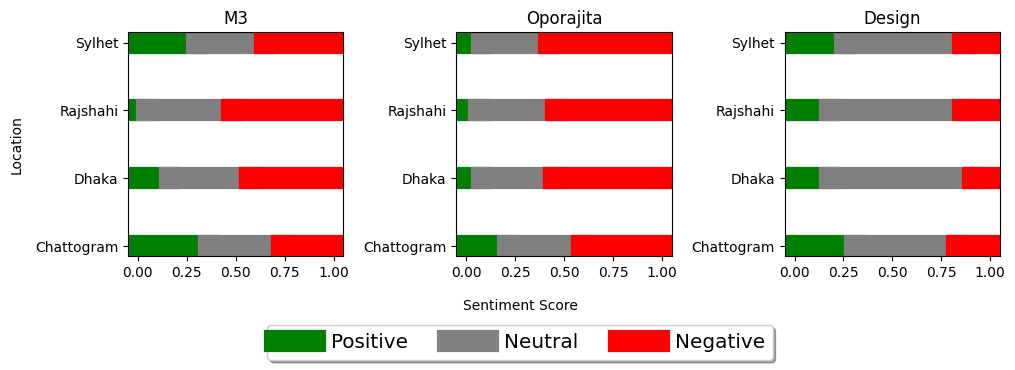

Sentiment Analysis for each Locations


In [11]:
sentiment = ['Group', 'Participant', 'Description', 'Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative']
def plot_thin_stacked_bar_subplot(df, title, ax, legend=False):
    # Stacked bar chart
    # Create an array of y-coordinates for each participant
    y = np.arange(len(df))

    # Define width for the bars
    bar_width = 4

    # Iterate through each row in the DataFrame
    for i, row in df.iterrows():
        participant = row['Group']
        ax.plot([0, row['Sentiment_Positive']], [y[i], y[i]], color='green', linewidth=4*bar_width, label='Positive' if i == 0 else None)
        ax.plot([row['Sentiment_Positive'], row['Sentiment_Positive'] + row['Sentiment_Neutral']], [y[i], y[i]], color='grey', linewidth=4*bar_width, label='Neutral' if i == 0 else None)
        ax.plot([row['Sentiment_Positive'] + row['Sentiment_Neutral'], row['Sentiment_Positive'] + row['Sentiment_Neutral'] + row['Sentiment_Negative']], [y[i], y[i]], color='red', linewidth=4*bar_width, label='Negative' if i == 0 else None)
    ax.set_title(title)
    ax.set_yticks(y)
    ax.set_yticklabels(custom_tick_labels) 

custom_tick_labels = ['Chattogram','Dhaka','Rajshahi','Sylhet' ]
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Plot each DataFrame on a separate subplot
plot_thin_stacked_bar_subplot(avg_sentiment_group_dataframe(m3_df), 'M3', axes[0])
plot_thin_stacked_bar_subplot(avg_sentiment_group_dataframe(oporajita_df), 'Oporajita', axes[1])
plot_thin_stacked_bar_subplot(avg_sentiment_group_dataframe(design_df), 'Design', axes[2], legend=True)


# Set common xlabel and ylabel for the entire figure
fig.text(0.5, -0.05, 'Sentiment Score', ha='center')
fig.text(-0.01, 0.5, 'Location', va='center', rotation='vertical')
# Create a legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.25), shadow=True, ncol=3, fontsize='x-large')

plt.tight_layout()
plt.show()
print('Sentiment Analysis for each Locations')

sentiment = ['Group', 'Participant', 'Description', 'Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative']

def avg_sentiment_group_dataframe(df):
    df_grouped = df.groupby('Group').agg({
        'Sentiment_Positive': 'mean',
        'Sentiment_Neutral': 'mean',
        'Sentiment_Negative': 'mean'
    }).reset_index()
    return df_grouped


In [12]:
def summary_sentiment(df):
    sentiments = ['Sentiment_Positive', 'Sentiment_Neutral', 'Sentiment_Negative']
    summary_data = {}  # Initialize an empty dictionary to store summary data for all sentiments
    for sentiment in sentiments:
        # Calculate min, avg, max for current sentiment
        summary_data[sentiment] = df[sentiment].agg(['min', 'mean', 'max'])
    return summary_data

summary_m3 = summary_sentiment(avg_m3_df)
summary_oporajita = summary_sentiment(avg_oporajita_df)
summary_design = summary_sentiment(avg_design_df)

print(summary_m3)
print(summary_oporajita)
print(summary_design)

{'Sentiment_Positive': min     0.015500
mean    0.227718
max     0.823500
Name: Sentiment_Positive, dtype: float64, 'Sentiment_Neutral': min     0.171300
mean    0.404164
max     0.696800
Name: Sentiment_Neutral, dtype: float64, 'Sentiment_Negative': min     0.005100
mean    0.368109
max     0.744000
Name: Sentiment_Negative, dtype: float64}
{'Sentiment_Positive': min     0.008500
mean    0.117502
max     0.939300
Name: Sentiment_Positive, dtype: float64, 'Sentiment_Neutral': min     0.056000
mean    0.358391
max     0.819740
Name: Sentiment_Neutral, dtype: float64, 'Sentiment_Negative': min     0.004800
mean    0.524101
max     0.858200
Name: Sentiment_Negative, dtype: float64}
{'Sentiment_Positive': min     0.051767
mean    0.232048
max     0.504560
Name: Sentiment_Positive, dtype: float64, 'Sentiment_Neutral': min     0.334717
mean    0.626896
max     0.918600
Name: Sentiment_Neutral, dtype: float64, 'Sentiment_Negative': min     0.018950
mean    0.141053
max     0.422450
Name: Sent

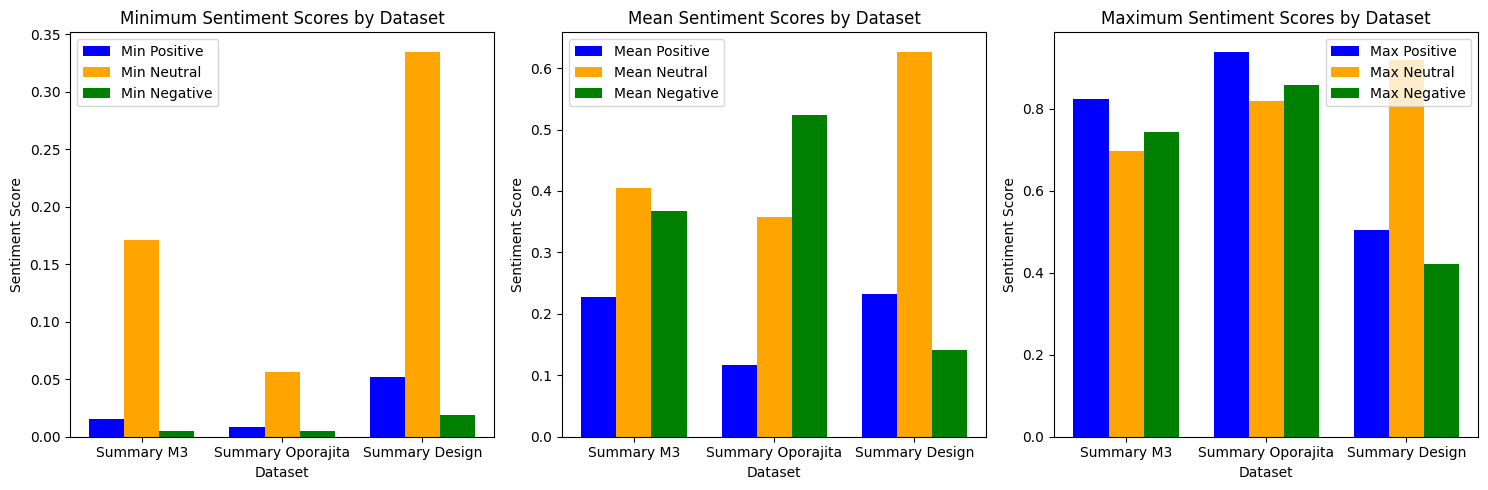

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data for minimum sentiment scores
min_positive = [summary_m3['Sentiment_Positive']['min'], 
                summary_oporajita['Sentiment_Positive']['min'], 
                summary_design['Sentiment_Positive']['min']]

min_neutral = [summary_m3['Sentiment_Neutral']['min'], 
               summary_oporajita['Sentiment_Neutral']['min'], 
               summary_design['Sentiment_Neutral']['min']]

min_negative = [summary_m3['Sentiment_Negative']['min'], 
                summary_oporajita['Sentiment_Negative']['min'], 
                summary_design['Sentiment_Negative']['min']]

# Data for mean sentiment scores
mean_positive = [summary_m3['Sentiment_Positive']['mean'], 
                 summary_oporajita['Sentiment_Positive']['mean'], 
                 summary_design['Sentiment_Positive']['mean']]

mean_neutral = [summary_m3['Sentiment_Neutral']['mean'], 
                summary_oporajita['Sentiment_Neutral']['mean'], 
                summary_design['Sentiment_Neutral']['mean']]

mean_negative = [summary_m3['Sentiment_Negative']['mean'], 
                 summary_oporajita['Sentiment_Negative']['mean'], 
                 summary_design['Sentiment_Negative']['mean']]

# Data for maximum sentiment scores
max_positive = [summary_m3['Sentiment_Positive']['max'], 
                summary_oporajita['Sentiment_Positive']['max'], 
                summary_design['Sentiment_Positive']['max']]

max_neutral = [summary_m3['Sentiment_Neutral']['max'], 
               summary_oporajita['Sentiment_Neutral']['max'], 
               summary_design['Sentiment_Neutral']['max']]

max_negative = [summary_m3['Sentiment_Negative']['max'], 
                summary_oporajita['Sentiment_Negative']['max'], 
                summary_design['Sentiment_Negative']['max']]

labels = ['Summary M3', 'Summary Oporajita', 'Summary Design']
x = np.arange(len(labels))
width = 0.25

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting minimum sentiment scores
axs[0].bar(x - width, min_positive, width, label='Min Positive', color='blue')
axs[0].bar(x, min_neutral, width, label='Min Neutral', color='orange')
axs[0].bar(x + width, min_negative, width, label='Min Negative', color='green')
axs[0].set_xlabel('Dataset')
axs[0].set_ylabel('Sentiment Score')
axs[0].set_title('Minimum Sentiment Scores by Dataset')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].legend()

# Plotting mean sentiment scores
axs[1].bar(x - width, mean_positive, width, label='Mean Positive', color='blue')
axs[1].bar(x, mean_neutral, width, label='Mean Neutral', color='orange')
axs[1].bar(x + width, mean_negative, width, label='Mean Negative', color='green')
axs[1].set_xlabel('Dataset')
axs[1].set_ylabel('Sentiment Score')
axs[1].set_title('Mean Sentiment Scores by Dataset')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].legend()

# Plotting maximum sentiment scores
axs[2].bar(x - width, max_positive, width, label='Max Positive', color='blue')
axs[2].bar(x, max_neutral, width, label='Max Neutral', color='orange')
axs[2].bar(x + width, max_negative, width, label='Max Negative', color='green')
axs[2].set_xlabel('Dataset')
axs[2].set_ylabel('Sentiment Score')
axs[2].set_title('Maximum Sentiment Scores by Dataset')
axs[2].set_xticks(x)
axs[2].set_xticklabels(labels)
axs[2].legend()

plt.tight_layout()
plt.show()


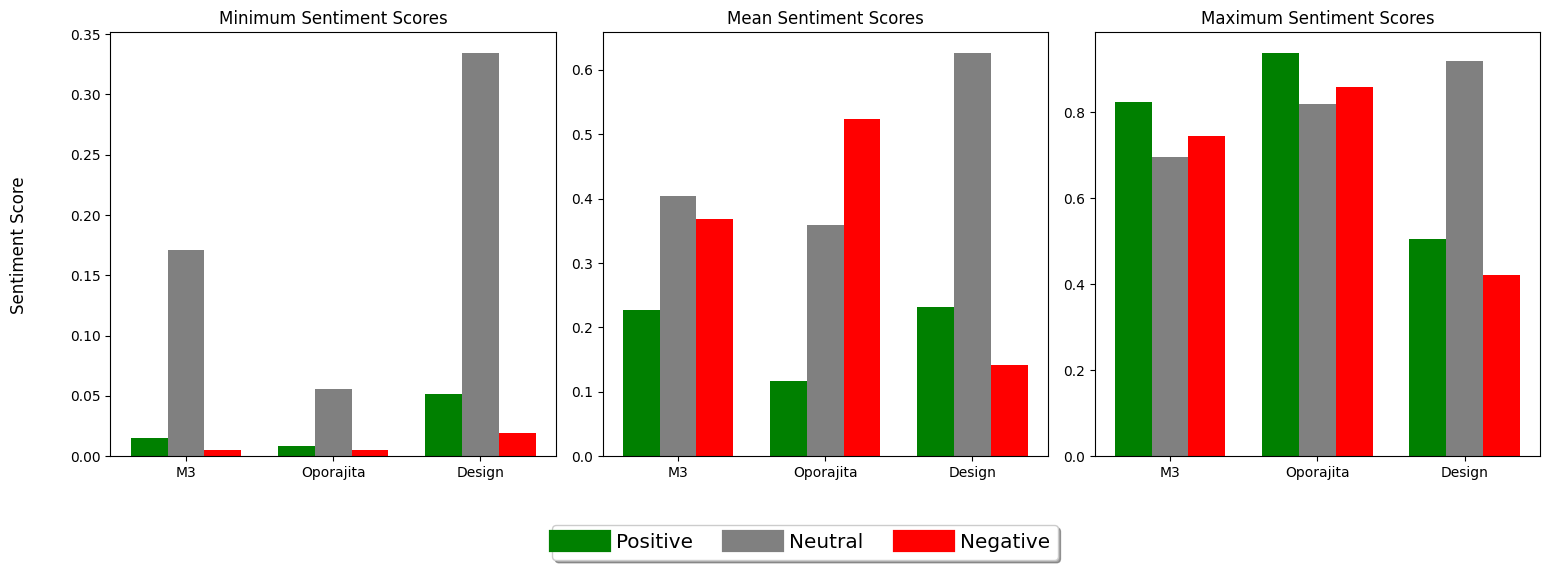

Min, Mean and Max Sentiment Scores


In [14]:
def plot_sentiment_scores(ax, data, title):
    labels = ['M3', 'Oporajita', 'Design']
    x = np.arange(len(labels))
    width = 0.25

    for i, (label, color) in enumerate(zip(['Positive', 'Neutral', 'Negative'], ['green', 'grey', 'red'])):
        ax.bar(x + i*width - width, data[label], width, label=label, color=color)

#     ax.set_xlabel('Dataset')
#     ax.set_ylabel('Sentiment Score')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

# Data
min_data = {
    'Positive': [summary_m3['Sentiment_Positive']['min'], 
                 summary_oporajita['Sentiment_Positive']['min'], 
                 summary_design['Sentiment_Positive']['min']],
    'Neutral': [summary_m3['Sentiment_Neutral']['min'], 
                summary_oporajita['Sentiment_Neutral']['min'], 
                summary_design['Sentiment_Neutral']['min']],
    'Negative': [summary_m3['Sentiment_Negative']['min'], 
                 summary_oporajita['Sentiment_Negative']['min'], 
                 summary_design['Sentiment_Negative']['min']]
}

mean_data = {
    'Positive': [summary_m3['Sentiment_Positive']['mean'], 
                 summary_oporajita['Sentiment_Positive']['mean'], 
                 summary_design['Sentiment_Positive']['mean']],
    'Neutral': [summary_m3['Sentiment_Neutral']['mean'], 
                summary_oporajita['Sentiment_Neutral']['mean'], 
                summary_design['Sentiment_Neutral']['mean']],
    'Negative': [summary_m3['Sentiment_Negative']['mean'], 
                 summary_oporajita['Sentiment_Negative']['mean'], 
                 summary_design['Sentiment_Negative']['mean']]
}

max_data = {
    'Positive': [summary_m3['Sentiment_Positive']['max'], 
                 summary_oporajita['Sentiment_Positive']['max'], 
                 summary_design['Sentiment_Positive']['max']],
    'Neutral': [summary_m3['Sentiment_Neutral']['max'], 
                summary_oporajita['Sentiment_Neutral']['max'], 
                summary_design['Sentiment_Neutral']['max']],
    'Negative': [summary_m3['Sentiment_Negative']['max'], 
                 summary_oporajita['Sentiment_Negative']['max'], 
                 summary_design['Sentiment_Negative']['max']]
}

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3, fontsize='x-large')

# Set common xlabel and ylabel for the entire figure
#fig.text(0.5, -0.05, 'Sentiment Score', ha='center')
fig.text(-0.03, 0.5, 'Sentiment Score', va='center', rotation='vertical', fontsize='large')
# Plotting minimum sentiment scores
plot_sentiment_scores(axs[0], min_data, 'Minimum Sentiment Scores')

# Plotting mean sentiment scores
plot_sentiment_scores(axs[1], mean_data, 'Mean Sentiment Scores')

# Plotting maximum sentiment scores
plot_sentiment_scores(axs[2], max_data, 'Maximum Sentiment Scores')

plt.tight_layout()
plt.show()
print('Min, Mean and Max Sentiment Scores')